In [76]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import io
from google.colab import files
sns.set_style("whitegrid")
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 
import plotly.figure_factory as ff
import math
from scipy.stats import norm

**Carga y Procesamiento de Datos**

In [16]:
uploaded = files.upload()

Saving tabla_3.csv to tabla_3.csv


In [20]:
uploaded = files.upload()

Saving datos_tablafrecuencia.xlsx to datos_tablafrecuencia.xlsx


**Tabla 3**

In [17]:
df1 = pd.read_csv(io.BytesIO(uploaded['tabla_3.csv']))
df1

,grupos,Frecuencia,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Index
0,"(1750, 1800]",4,0.117647,11.764706,4,"(1750, 1800]"
1,"(1800, 1850]",4,0.117647,11.764706,8,"(1800, 1850]"
2,"(1850, 1900]",11,0.323529,32.352941,19,"(1850, 1900]"
3,"(1900, 1950]",11,0.323529,32.352941,30,"(1900, 1950]"
4,"(1950, 2000]",4,0.117647,11.764706,34,"(1950, 2000]"


In [ ]:
df1.drop([ 'Index'], axis=1, inplace=True)
df1

,grupos,Frecuencia,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada
0,"(1750, 1800]",4,0.117647,11.764706,4
1,"(1800, 1850]",4,0.117647,11.764706,8
2,"(1850, 1900]",11,0.323529,32.352941,19
3,"(1900, 1950]",11,0.323529,32.352941,30
4,"(1950, 2000]",4,0.117647,11.764706,34


In [21]:
df2 = pd.read_excel(io.BytesIO(uploaded['datos_tablafrecuencia.xlsx']))
df2.head()

,Lugar,Participantes,País,Resultados (segundos)
0,1,Almaz Ayana,ETH,1757
1,2,Vivian Jepkemoi Cheruiyot,KEN,1772
2,3,Tirunesh Dibaba,ETH,1782
3,4,Alice Aprot Nawowuna,KEN,1793
4,5,Betsy Saina,KEN,1807


**Tabla 1**

In [6]:
df = pd.DataFrame({'Proveedor_1': [110,100,90,100,110,110,100,110,100,100], 'Proveedor_2': [80,100,130,70,100,110,100,70,150,120]})
df

,Proveedor_1,Proveedor_2
0,110,80
1,100,100
2,90,130
3,100,70
4,110,100
5,110,110
6,100,100
7,110,70
8,100,150
9,100,120


**Calculos Tabla 1**

In [9]:
print('La Moda del proveedor uno es de =', df['Proveedor_1'].value_counts())

La Moda del proveedor uno es de = 100    5
110    4
90     1
Name: Proveedor_1, dtype: int64


In [11]:
print('La Moda del proveedor dos es de =', df['Proveedor_2'].value_counts())

La Moda del proveedor dos es de = 100    3
70     2
110    1
150    1
120    1
130    1
80     1
Name: Proveedor_2, dtype: int64


In [ ]:
print('Media de Proveedor1 =', df['Proveedor_1'].mean())
print('Media de Proveedor2 =', df['Proveedor_2'].mean())

Media de Proveedor1 = 103.0
Media de Proveedor2 = 103.0


In [ ]:
print('Mediana de Proveedor1 =', df['Proveedor_1'].median())
print('Mediana de Proveedor2 =', df['Proveedor_2'].median())

Mediana de Proveedor1 = 100.0
Mediana de Proveedor2 = 100.0


In [ ]:
print('Moda de Proveedor1 =', 100)
print('Moda de Proveedor2 =', 100)

Moda de Proveedor1 = 100
Moda de Proveedor2 = 100


In [8]:
print('Rango de Proveedor1 =', df['Proveedor_1'].max() - df['Proveedor_1'].min())
print('Rango de Proveedor2 =', df['Proveedor_2'].max() - df['Proveedor_2'].min())

Rango de Proveedor1 = 20
Rango de Proveedor2 = 80


In [ ]:
print('Desviación Estandar de Proveedor1 =', df['Proveedor_1'].std())
print('Desviación Estandar de Proveedor2 =', df['Proveedor_2'].std())

Desviación Estandar de Proveedor1 = 6.749485577105529
Desviación Estandar de Proveedor2 = 25.841396591085743


In [ ]:
print('Varianza de Proveedor1 =', df['Proveedor_1'].var())
print('Varianza de Proveedor2 =', df['Proveedor_2'].var())

Varianza de Proveedor1 = 45.55555555555556
Varianza de Proveedor2 = 667.7777777777778


In [ ]:
print('Coeficiente de Variación de Proveedor1 =', df['Proveedor_1'].std() / df['Proveedor_1'].mean()*100)
print('Coeficiente de Variación de Proveedor2 =', df['Proveedor_2'].std() / df['Proveedor_2'].mean()*100)

Coeficiente de Variación de Proveedor1 = 6.552898618549056
Coeficiente de Variación de Proveedor2 = 25.08873455445218


In [ ]:
df.describe()

,Proveedor_1,Proveedor_2
count,10.000000,10.000000
mean,103.000000,103.000000
std,6.749486,25.841397
min,90.000000,70.000000
25%,100.000000,85.000000
50%,100.000000,100.000000
75%,110.000000,117.500000
max,110.000000,150.000000


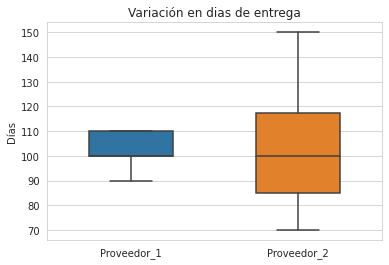

In [60]:
sns.boxplot(data=df, width=.5).set(title= 'Variación en dias de entrega', ylabel= 'Días')
plt.show()

**Calculos Tabla 3**

In [22]:
df2['grupos'] = pd.cut(df2['Resultados (segundos)'], bins= [1750, 1800, 1850, 1900, 1950, 2000 ])
g = df2.groupby(['grupos'])


In [23]:
df2['grupos'] = df2['grupos'].astype(str)
df2.dtypes

Lugar                     int64
Participantes            object
País                     object
Resultados (segundos)     int64
grupos                   object
dtype: object

In [24]:
for grupos, grupos_df2 in g:
    print(grupos)
    print(grupos_df2)

(1750, 1800]
   Lugar              Participantes País  Resultados (segundos)        grupos
0      1                Almaz Ayana  ETH                   1757  (1750, 1800]
1      2  Vivian Jepkemoi Cheruiyot  KEN                   1772  (1750, 1800]
2      3            Tirunesh Dibaba  ETH                   1782  (1750, 1800]
3      4       Alice Aprot Nawowuna  KEN                   1793  (1750, 1800]
(1800, 1850]
   Lugar Participantes País  Resultados (segundos)        grupos
4      5   Betsy Saina  KEN                   1807  (1800, 1850]
5      6  Molly Huddle  USA                   1813  (1800, 1850]
6      7   Yasemin Can  TUR                   1826  (1800, 1850]
7      8  Gelete Burka  ETH                   1826  (1800, 1850]
(1850, 1900]
    Lugar              Participantes País  Resultados (segundos)        grupos
8       9  Karoline Bjerkeli Grovdal  NOR                   1874  (1850, 1900]
9      10            Eloise Wellings  AUS                   1874  (1850, 1900]
10     11

In [51]:
descriptiva = g.describe()
descriptiva.drop([ 'Lugar'], axis=1, inplace=True)
descriptiva

Resultados (segundos)               ...                 
                             count         mean  ...      75%     max
grupos                                           ...                 
(1750, 1800]                   4.0  1776.000000  ...  1784.75  1793.0
(1800, 1850]                   4.0  1818.000000  ...  1826.00  1826.0
(1850, 1900]                  11.0  1888.909091  ...  1895.50  1896.0
(1900, 1950]                  11.0  1920.545455  ...  1927.50  1931.0
(1950, 2000]                   4.0  1965.000000  ...  1965.25  1984.0

[5 rows x 8 columns]

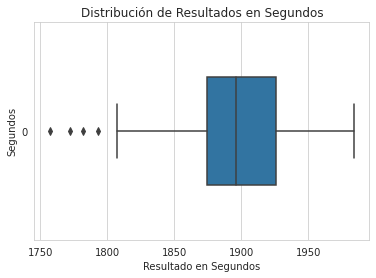

In [81]:
sns.boxplot(data= df2['Resultados (segundos)'], width=.5, orient= 'h').set(title= 'Distribución de Resultados en Segundos', xlabel= 'Resultado en Segundos', ylabel='Segundos')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



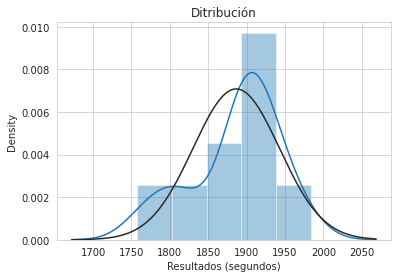

In [79]:
sns.distplot(df2['Resultados (segundos)'], bins=5, fit=norm).set(title= 'Ditribución')
plt.show()

In [48]:
frecuencia = g.count()
frecuencia.drop([ 'Lugar', 'País', 'Resultados (segundos)'], axis=1, inplace=True)
frecuencia

,Participantes
grupos,
"(1750, 1800]",4
"(1800, 1850]",4
"(1850, 1900]",11
"(1900, 1950]",11
"(1950, 2000]",4


In [26]:
media = g.mean()
media.drop([ 'Lugar'], axis=1, inplace=True)
media.rename(columns={'Resultados (segundos)':'Media',}, inplace=True)
media

,Media
grupos,
"(1750, 1800]",1776.000000
"(1800, 1850]",1818.000000
"(1850, 1900]",1888.909091
"(1900, 1950]",1920.545455
"(1950, 2000]",1965.000000


In [27]:
mediana = g.median()
mediana.drop([ 'Lugar'], axis=1, inplace=True)
mediana.rename(columns={'Resultados (segundos)':'Mediana',}, inplace=True)
mediana

,Mediana
grupos,
"(1750, 1800]",1777.0
"(1800, 1850]",1819.5
"(1850, 1900]",1892.0
"(1900, 1950]",1924.0
"(1950, 2000]",1959.0


In [28]:
varianza = g.var()
varianza.drop([ 'Lugar'], axis=1, inplace= True)
varianza.rename(columns={'Resultados (segundos)':'Varianza',}, inplace=True)
varianza

,Varianza
grupos,
"(1750, 1800]",234.000000
"(1800, 1850]",91.333333
"(1850, 1900]",66.890909
"(1900, 1950]",77.472727
"(1950, 2000]",160.666667


In [29]:
desviacion = g.std()
desviacion.drop([ 'Lugar'], axis=1, inplace=True)
desviacion.rename(columns={'Resultados (segundos)':'Desviación Std.',}, inplace=True)
desviacion

,Desviación Std.
grupos,
"(1750, 1800]",15.297059
"(1800, 1850]",9.556847
"(1850, 1900]",8.178686
"(1900, 1950]",8.801859
"(1950, 2000]",12.675436


In [50]:
medidas = media
medidas['Frecuencia'] = frecuencia
medidas['Mediana'] = mediana
medidas['Varianza'] = varianza
medidas['Desv_Std'] = desviacion
medidas

,Media,Mediana,Varianza,Desv_Std,Frecuencia
grupos,,,,,
"(1750, 1800]",1776.000000,1777.0,234.000000,15.297059,4
"(1800, 1850]",1818.000000,1819.5,91.333333,9.556847,4
"(1850, 1900]",1888.909091,1892.0,66.890909,8.178686,11
"(1900, 1950]",1920.545455,1924.0,77.472727,8.801859,11
"(1950, 2000]",1965.000000,1959.0,160.666667,12.675436,4


In [ ]:
rango = df2['Resultados (segundos)'].max() - df2['Resultados (segundos)'].min()
print('El Rango del los resultados en segundos es =', rango)

El Rango del los resultados en segundos es = 227


In [ ]:
P = 3*(df2['Resultados (segundos)'].mean() - df2['Resultados (segundos)'].median()) / df2['Resultados (segundos)'].std()
print('El coeficiente de asimetria =', P) 

El coeficiente de asimetria = -0.4997856428505742


In [82]:
g2 = df2.groupby(['País'])
for grupos, grupos_df2 in g2:
    print(grupos)
    print(grupos_df2)

AUS
   Lugar    Participantes País  Resultados (segundos)        grupos
9     10  Eloise Wellings  AUS                   1874  (1850, 1900]
BDI
    Lugar Participantes País  Resultados (segundos)        grupos
12     13  Diane Nukuri  BDI                   1888  (1850, 1900]
BRA
    Lugar                Participantes  ... Resultados (segundos)        grupos
30     31  Tatiele Roberta de Carvalho  ...                  1958  (1950, 2000]

[1 rows x 5 columns]
CAN
    Lugar   Participantes País  Resultados (segundos)        grupos
21     22   Natasha Wodak  CAN                   1913  (1900, 1950]
24     25  Lanni Marchant  CAN                   1924  (1900, 1950]
ESP
    Lugar Participantes País  Resultados (segundos)        grupos
28     29  Trihas Gebre  ESP                   1929  (1900, 1950]
ETH
   Lugar    Participantes País  Resultados (segundos)        grupos
0      1      Almaz Ayana  ETH                   1757  (1750, 1800]
2      3  Tirunesh Dibaba  ETH                   1782 

In [92]:
ETH

,Lugar,Participantes,País,Resultados (segundos),grupos
0,1,Almaz Ayana,ETH,1757,"(1750, 1800]"
2,3,Tirunesh Dibaba,ETH,1782,"(1750, 1800]"
7,8,Gelete Burka,ETH,1826,"(1800, 1850]"


In [93]:
KEN

,Lugar,Participantes,País,Resultados (segundos),grupos
1,2,Vivian Jepkemoi Cheruiyot,KEN,1772,"(1750, 1800]"
3,4,Alice Aprot Nawowuna,KEN,1793,"(1750, 1800]"
4,5,Betsy Saina,KEN,1807,"(1800, 1850]"


**Ejercicio 3**

Teorema de Chebychev

In [95]:
def chebichev(mean, stdev):
    k1_5 = mean+(stdev*1.5)
    k2 = mean+(stdev*2)
    k2_5 = mean +(stdev*2.5)
    k3 = mean +(stdev*3)
    k3_5= mean +(stdev*3.5)
    return(k1_5, k2, k2_5, k3, k3_5)
    

In [96]:
def chebichev_neg(mean, stdev):
    k1_5 = mean-(stdev*1.5)
    k2 = mean-(stdev*2)
    k2_5 = mean-(stdev*2.5)
    k3 = mean-(stdev*3)
    k3_5= mean-(stdev*3.5)
    return(k1_5, k2, k2_5, k3, k3_5)

In [97]:
k_pos = chebichev(6.8, 1.2)
k_pos

(8.6, 9.2, 9.8, 10.399999999999999, 11.0)

In [98]:
k_neg = chebichev_neg(6.8,1.2)
k_neg

(5.0, 4.4, 3.8, 3.2, 2.5999999999999996)

In [99]:
df3 = pd.DataFrame({'Valores de K': [1.5,2,2.5,3,3.5], 'Valores K_%': [.5556, .75, .84, .8889, .9184], 'Limite inferior':k_neg, 'Limite Superior':k_pos })
df3

,Valores de K,Valores K_%,Limite inferior,Limite Superior
0,1.5,0.5556,5.0,8.6
1,2.0,0.7500,4.4,9.2
2,2.5,0.8400,3.8,9.8
3,3.0,0.8889,3.2,10.4
4,3.5,0.9184,2.6,11.0


Regla Empirica


In [100]:
def reg_emp(mean, stdv):
    x1 = mean+(stdv*1)
    x2 = mean+(stdv*2)
    x3 = mean+(stdv*3)
    return(x1, x2, x3)

In [101]:
def reg_empneg(mean, stdv):
    x1 = mean-(stdv*1)
    x2 = mean-(stdv*2)
    x3 = mean-(stdv*3)
    return(x1, x2, x3)

In [102]:
emp = reg_emp(6.8,1.2)
emp

(8.0, 9.2, 10.399999999999999)

In [103]:
emp_neg = reg_empneg(6.8, 1.2)
emp_neg


(5.6, 4.4, 3.2)

In [104]:
df4 = pd.DataFrame({'Porcentaje': [.68,.95,.997], 'Valor_minimo':emp_neg , 'Valor_maximo':emp })
df4

,Porcentaje,Valor_minimo,Valor_maximo
0,0.680,5.6,8.0
1,0.950,4.4,9.2
2,0.997,3.2,10.4
